> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 4: Parsing wine data

In this Exercise Set 4 we will work with unsupervised machine learning, primarily dimensionality reduction and clustering, on the Wine and Digits datasets.

**Load data**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

%matplotlib inline

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

<br>
<br>

## Dimensionality reduction

> **Ex. 4.1.1**: Implement PCA from scratch, and apply it to the wine dataset.
1. Visualize data along the first two principal components. Make sure to comment your
code to explain where each bit fits in the overall PCA algorithm.
2. Plot the explained variance ratio for all components. It can be computed by taking the
of a component and dividing it by the sum of all eigenvalues.
>
> *Hint: You can follow the steps outlined in the slides, or in Raschka 2017. If you follow
my example from the slides, note that there was an error at step 4, which is now fixed in an
updated version on Github.*

In [4]:
# [Answer to Ex. 4.1.1]

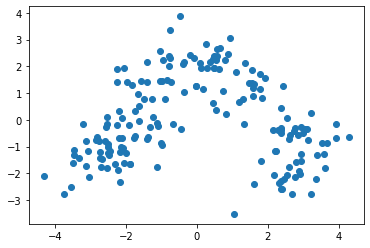

In [5]:
# part 1

from sklearn.preprocessing import StandardScaler

# Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X_wine)

# Get covariance matrix
cov_mat = np.cov(X_std.T)

# Compute its eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Sort eigenvectors by eigenvalues in descending order
eigen_vals, eigen_vecs = zip(*sorted(
    zip(abs(eigen_vals), eigen_vecs.T),
    key=lambda kv: kv[0], reverse=True
))

# Get the top 2 eigenvectors
top_k_eigen_vecs = eigen_vecs[:2]

# Compose basis transformation matrix
W = np.hstack([
    w.reshape(-1, 1) for w in top_k_eigen_vecs
])

# Transform datapoints
Z = np.dot(X_std, W)

# Plot
plt.scatter(Z[:, 0], Z[:, 1])

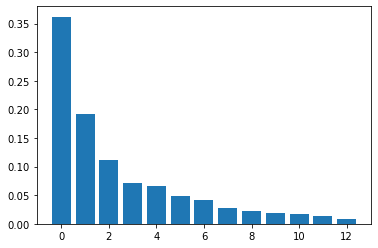

In [6]:
# part 2

normed_eigenvals = np.array(eigen_vals) / sum(eigen_vals)
plt.figure()
plt.bar(range(len(eigen_vals)), normed_eigenvals)
plt.show()

> **Ex. 4.1.2**: Read the paper [Transparency and Deliberation within the FOMC: A Computational Linguistics Approach](https://sekhansen.github.io/pdf_files/qje_2018.pdf). 
> - How do they preprocess the text data?
> - How many latent topics do they choose? 
> - How does the topics allow them say something about their hypothesis?

## Clustering

> **Ex. 4.1.3**: Run the code below to apply K-Means after having extracted the two first principal components. Explain what happens to the data? How fast does the K-Means approach converge?

In [4]:
# [Answer to Ex. 4.1.3]

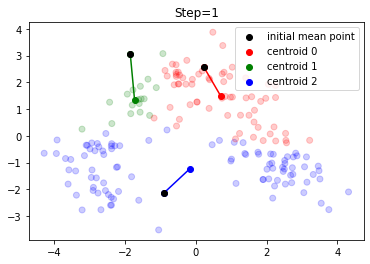

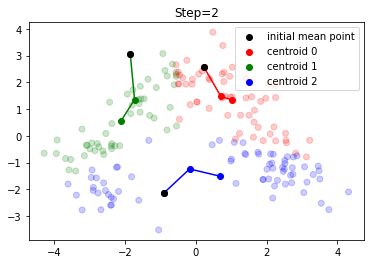

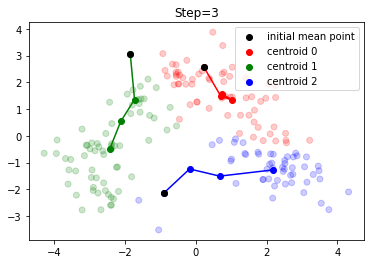

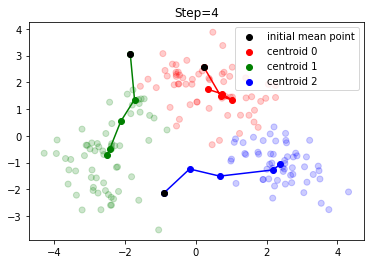

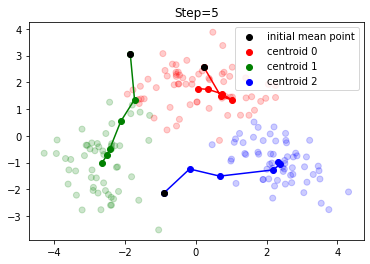

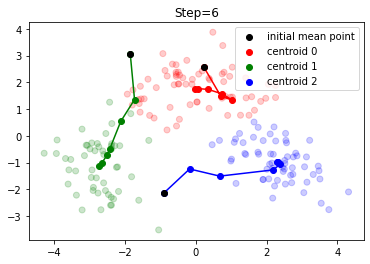

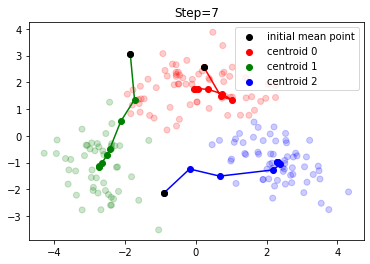

7

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from kmeans import KMeans

# fit the pca and get the two first components
X_wine_std = StandardScaler().fit_transform(X_wine)
X_wine_pca = PCA().fit_transform(X_wine_std)[:, :2]

# apply the 
model = KMeans(k=3)
model.fit(X_wine_pca)